<a href="https://colab.research.google.com/github/zry3fr/undergrad_ml_assignments/blob/main/COMPLETE_01_assignment_wrangling_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/zry3fr/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 33 (delta 10), reused 4 (delta 4), pack-reused 19 (from 1)
Receiving objects: 100% (33/33), 42.65 KiB | 14.22 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Download complete
Extracting data files...
Data extracted


# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.

1.

In [ ]:
import pandas as pd

In [ ]:
airbnb = pd.read_csv(
    '/content/data/airbnb_NYC.csv',
    encoding='latin1'
)
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
price_clean = (
    airbnb['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
)

price_numeric = pd.to_numeric(price_clean, errors='coerce')

I converted everything in the price column into strings to ensure consistent datatypes. Then, I removed the commas, which are just thousand separators and are not meaningful numerically. Lastly, I converted the values numeric using 'to_numeric' while also making invalid values appear as 'NaN'.

In [ ]:
airbnb['Price']

,Price
0,145
1,37
2,28
3,199
4,549
...,...
30473,300
30474,125
30475,80
30476,35


After cleaning, there are 0 missing values. All entries under the price column are valid numbers.

2.

In [ ]:
import numpy as np

In [ ]:
force = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')
force.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
orig_counts = force['subject_injury'].value_counts(dropna=False)
orig_counts

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [ ]:
missing_prop = force['subject_injury'].isna().mean()
missing_prop

np.float64(0.7619342359767892)

In [ ]:
force['subject_injury_clean'] = (
    force['subject_injury']
    .astype('string')
    .str.strip()
    .str.lower()
    .map({
        'yes': 'Yes',
        'y': 'Yes',
        'true': 'Yes',
        'injured': 'Yes',
        'no': 'No',
        'n': 'No',
        'false': 'No',
        'not injured': 'No'
    })
)

About 76.2% of all injury outcomes are missing.

In [ ]:
crosstab_before = pd.crosstab(force['force_type'], force['subject_injury_clean'], dropna=False)
crosstab_before

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


A key pattern is that some force types, such as 'Maximal Restraint Technique', have almost entirely missing injury information.  

In [ ]:
force['subject_injury_clean'] = force['subject_injury_clean'].fillna('Missing')

In [ ]:
crosstab_after = pd.crosstab(force['force_type'], force['subject_injury_clean'])
crosstab_after

subject_injury_clean,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


3.

In [ ]:
metabric = pd.read_csv('/content/data/metabric.csv')
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
metabric['Overall Survival Status'].value_counts(dropna=False)

,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [ ]:
metabric['overall_survival_dummy'] = (
    metabric['Overall Survival Status']
    .str.strip()
    .str.lower()
    .map({
        'deceased': 0,
        'living': 1
    })
)

In [ ]:
metabric[['Overall Survival Status', 'overall_survival_dummy']].head()

,Overall Survival Status,overall_survival_dummy
0,0:LIVING,NaN
1,1:DECEASED,NaN
2,0:LIVING,NaN
3,1:DECEASED,NaN
4,1:DECEASED,NaN


4.

In [ ]:
missing_count = airbnb['Review Scores Rating'].isna().sum()
missing_count

np.int64(8323)

There are 8323 missing values.

In [ ]:
median_rating = airbnb['Review Scores Rating'].median()
median_rating

94.0

In [ ]:
airbnb['review_score_imputed'] = airbnb['Review Scores Rating'].fillna(median_rating)

Median imputation can negatively affect analysis, because the missing reviews are not random. Listings with no reviews might indicate new, inactive, or lower quality ratings. Therefore, assigning them a higher median score, such as 94, overstates their quality.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.


1.

In [ ]:
shark_attacks = pd.read_excel('/GSAF5.xls')
shark_attacks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using 'read_excel' works because the format is an excel file instead of a csv file, which is why 'read_csv' does not work.

2.

In [ ]:
shark_attacks = shark_attacks.dropna(axis=1, how='all')

3.

Each observation or row represents a single shark incident. Understanding this matters for cleaning so I do not accidentally aggregate two incidents into one. Additionally, it helps me understand that I should not treat columns as separate observations. Cleaning should include preserving one row per shark incident.

4.

In [ ]:
shark_attacks['Year_clean'] = pd.to_numeric(shark_attacks['Year'], errors='coerce')

In [ ]:
shark_attacks['Year_clean'].describe()

,Year_clean
count,7068.000000
mean,1935.953311
std,270.740135
min,0.000000
25%,1948.000000
50%,1986.000000
75%,2010.000000
max,2026.000000


The dataset includes shark attack incidents from as early as the 1940s to more recent years such as 2026.

In [ ]:
shark_attacks_modern = shark_attacks[shark_attacks['Year_clean'] >= 1940]
shark_attacks_modern

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Year_clean
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0,NaN,NaN,1940.0
5532,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0,NaN,NaN,1940.0
5533,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0,NaN,NaN,1940.0
5534,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0,NaN,NaN,1940.0


<Axes: xlabel='Year_clean'>

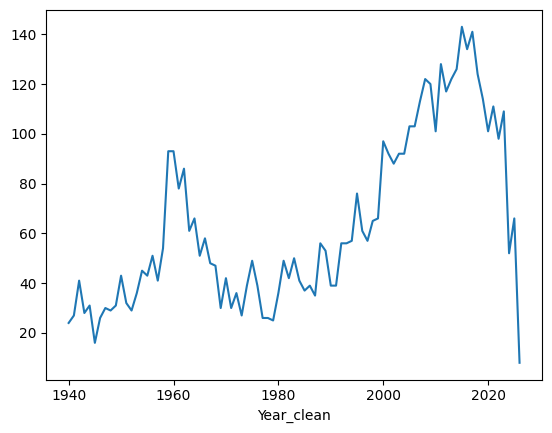

In [ ]:
attacks_by_year = shark_attacks_modern['Year_clean'].value_counts().sort_index()
attacks_by_year.plot(kind='line')

Since 2020, shark attacks seem to be declining steeply. However, before that, since around 1980, shark attacks seemed to be increasing overtime until around 2020.

5.

In [ ]:
shark_attacks['Age_clean'] = pd.to_numeric(shark_attacks['Age'], errors='coerce')

In [ ]:
import matplotlib.pyplot as plt

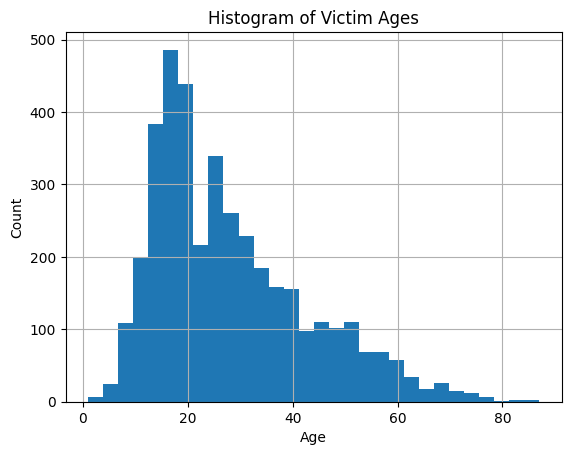

In [ ]:
shark_attacks['Age_clean'].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Victim Ages")
plt.show()

6.

In [ ]:
shark_attacks['Type_clean'] = (
    shark_attacks['Type']
    .str.strip()
    .str.lower()
    .map({
        'provoked': 'Provoked',
        'unprovoked': 'Unprovoked'
    })
    .fillna('Unknown')
)

In [ ]:
shark_attacks['Type_clean'].value_counts(normalize=True)

,proportion
Type_clean,
Unprovoked,0.738614
Unknown,0.170297
Provoked,0.091089


About 74% of attacks are unprovoked.

7.

In [ ]:
shark_attacks['Fatal_clean'] = (
    shark_attacks['Fatal Y/N']
    .str.strip()
    .str.upper()
    .map({'Y': 'Y', 'N': 'N'})
    .fillna('Unknown')
)

8.

In [ ]:
cross = pd.crosstab(shark_attacks['Type_clean'], shark_attacks['Fatal_clean'], normalize='index')
cross

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742244,0.015128,0.242627


The attack is more likely to be fatal when unprovoked. This was actually surprising to me as I thought provoked attacks would be more likely to be fatal, because the shark is more likely to be angry.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.



1. This paper is focused on data tidying and develops a framework that makes cleaning data easier and more effective.

2. The tiny data standard intends to make data cleaning and analysis easier. Using this structure simplifies data manipulation by ensuring consistency within the data values and enhancing readability for comprehending the dataset.

3.
- **"Like families, tidy datasets are all alike but every messy dataset is messy in its own way."**
This means that tidy datasets always follow the same consistent strict rules. For example, each variable is a column and each observation is a row. Messy datasets are unstructured in unique ways and can often be disorganized. For example, scattered variables and inconsistent formatting.
- **"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."** This means that it is easy to understand instantly when looking at a dataset what the rows and column are. However, because data structure is so relative, it is difficult to universally define terms that apply to all data types.

4. Values are numbers (if quantitative) or strings (if qualitative) and they belong to a variable and an observation. Variables contain all values that measure the same attribute, such as height, across units. Observations contain all values measured on the same unit, such as a person, across atrributes.

5. Tidy data is defined as a way of mapping the meaning of a dataset to its structure. For example, tidy data is when each variable forms a column, each observation forms a row, and each type of observation unit forms a table. Tidy data helps with data analysis as it makes extracting needed variables easier through a standard way of structing a dataset.

6. The 5 most common problems with messy datasets are


*   Column headers are values, not variable names
*   Multiple variables are stored in one column
* Variables are stored in both rows and columns
* Multiple types of observational units are stored in the same table
* A single observational unit is stored in multiple tables

The data in table 4 is messy, because the column headers are numeric values (income) instead of variables names.

"Melting" is transforming a dataset from a wide format into a long format. For example, in table 4, melting includes transforming the values in the column header into rows.



7. Table 11 is messy, because it has variables stored in both rows and columns. Specifically, it has individual columns (id, year, month), spread across columns (day, d-d31), and across rows (tmin, tmax). Table 12 is tidy and "molten", because it separates the values stored in both rows and columns. Specifically, there is one variable in each column while each row represents a day's observation.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.



1.

In [ ]:
import pandas as ps
import matplotlib.pyplot as plt

In [ ]:
foreign_gifts = pd.read_csv('/content/data/ForeignGifts_edu.csv')
foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2.

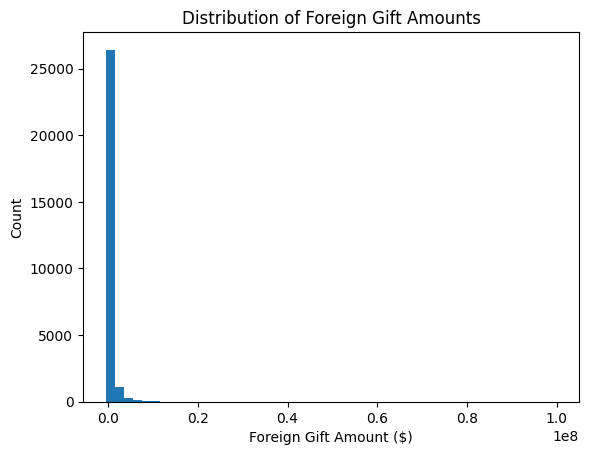

In [ ]:
plt.figure()
plt.hist(foreign_gifts['Foreign Gift Amount'].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount ($)")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

In [ ]:
foreign_gifts['Foreign Gift Amount'].describe()

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


It appears that most gifts are small, because the distribution is extremely skewed to the left. Additionally, a small number of very large gifts dominate the total amount, making the mean misleading.

3.

In [ ]:
foreign_gifts['Gift Type'].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


About 61.2% of the gifts are contracts, about 39% of the gifts are monetary gifts, and about .0004% of the gifts are real estate.

4.

In [ ]:
foreign_gifts.groupby('Country of Giftor')['ID'] \
  .count() \
  .sort_values(ascending=False) \
  .head(15)

,ID
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'] \
  .sum() \
  .sort_values(ascending=False) \
  .head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


5.

In [ ]:
top_institutions = (
    foreign_gifts.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)
top_institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


In [ ]:
institutions_total = (
    foreign_gifts.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
)
institutions_total

,Foreign Gift Amount
Institution Name,
Adelphi University,1000000
Albert Einstein College of Medicine,4252385
Alfred University,2711699
American University (The),3489000
Amherst College,778723
...,...
Wright State University,1693644
Xavier University of Louisiana,706193
Yale University,613441311


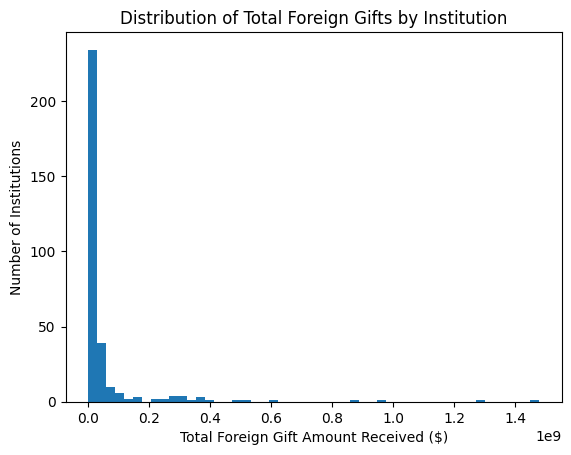

In [ ]:
plt.figure()
plt.hist(institutions_total, bins=50)
plt.xlabel("Total Foreign Gift Amount Received ($)")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts by Institution")
plt.show()

6.

In [ ]:
foreign_gifts.groupby('Giftor Name')['Foreign Gift Amount'] \
  .sum() \
  .sort_values(ascending=False) \
  .head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)


1.

In [11]:
college = pd.read_csv('/content/data/college_completion.csv')

2.

In [12]:
college.shape

(3798, 63)

In [13]:
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3.

In [14]:
cross_college = pd.crosstab(college['control'], college['level'])
cross_college

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


It seems that public universities have a large number of 2-year and 4-year, most likely indicating 2-year community colleges. Additionally, private not-for-profit are more heavily 4-year and seldom 2-year.

4.

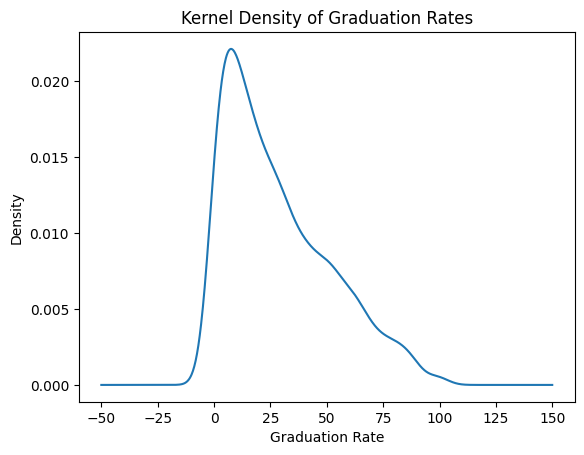

In [15]:
plt.figure()
college['grad_100_value'].plot(kind='kde')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.title('Kernel Density of Graduation Rates')
plt.show()

In [17]:
college['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


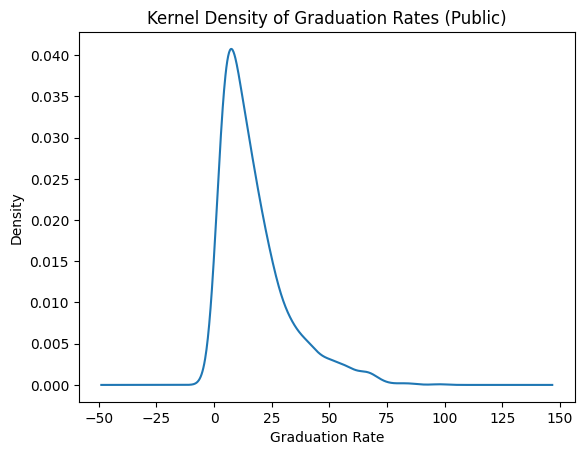

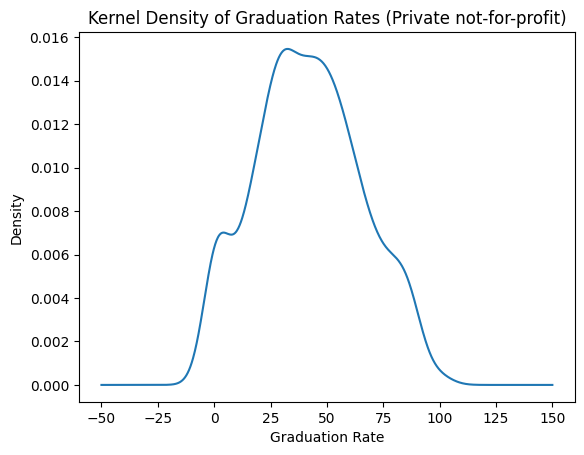

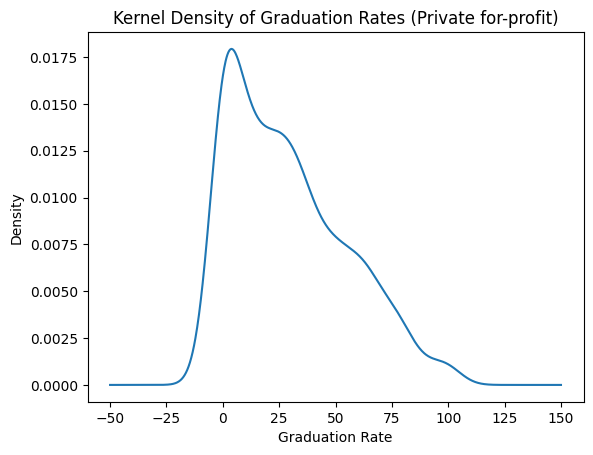

In [19]:
for c in college['control'].dropna().unique():
    subset = college[college['control'] == c]

    plt.figure()
    subset['grad_100_value'].plot(kind='kde')
    plt.xlabel('Graduation Rate')
    plt.ylabel('Density')
    plt.title(f'Kernel Density of Graduation Rates ({c})')
    plt.show()

In [20]:
college.groupby('control')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


Private not-for-profit institutions appear to have the most favorable graduation rates.

5.

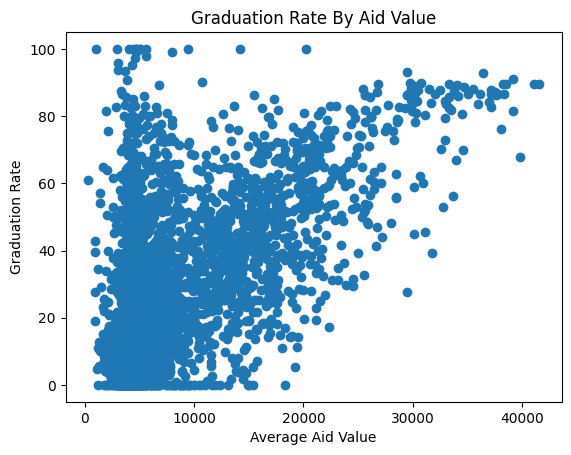

In [21]:
plt.figure()
plt.scatter(college['aid_value'], college['grad_100_value'])
plt.xlabel('Average Aid Value')
plt.ylabel('Graduation Rate')
plt.title('Graduation Rate By Aid Value')
plt.show()

In [22]:
cov = college['grad_100_value'].cov(college['aid_value'])
cov

np.float64(88610.48316902434)

In [23]:
corr = college['grad_100_value'].corr(college['aid_value'])
corr

np.float64(0.5758792845936073)

The scatterplot shows a weak positive relationship between aid value and graduation rate. Specifically, institutions offering higher aid often have somewhat higher graduation rates.

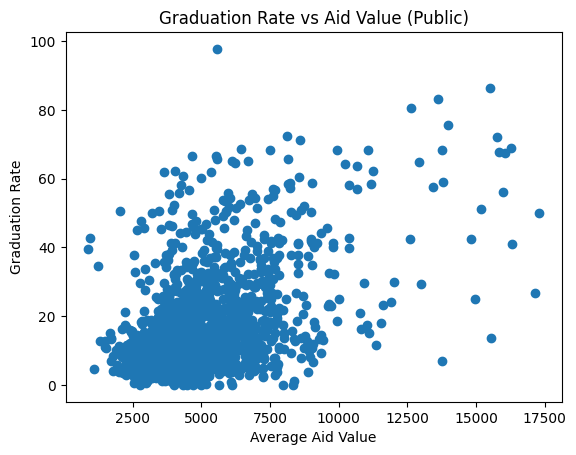

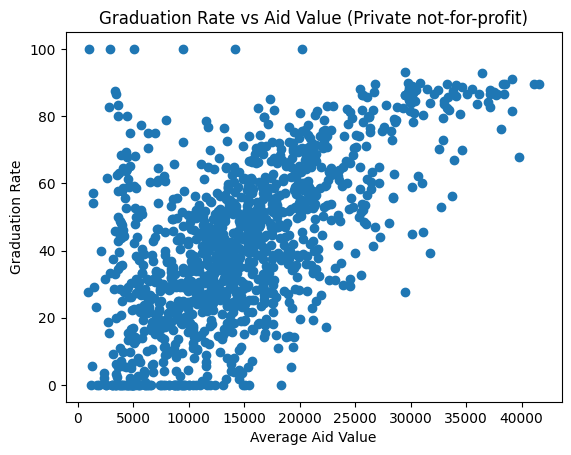

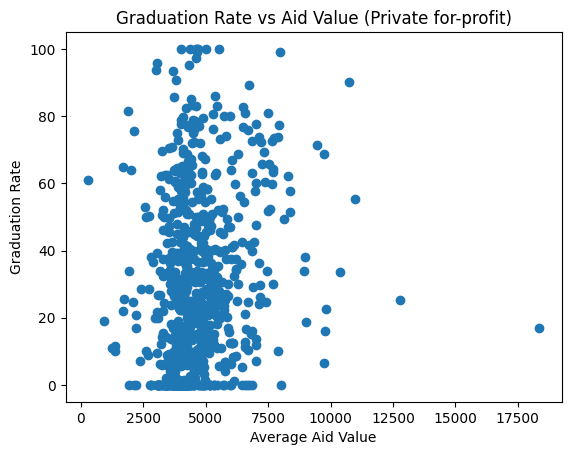

In [24]:
for c in college['control'].unique():
    subset = college[college['control'] == c]

    plt.figure()
    plt.scatter(subset['aid_value'], subset['grad_100_value'])
    plt.xlabel('Average Aid Value')
    plt.ylabel('Graduation Rate')
    plt.title(f'Graduation Rate vs Aid Value ({c})')
    plt.show()

In [29]:
college.groupby('control')[['grad_100_value', 'aid_value']].cov()

grad_100_value     aid_value
control                                                            
Private for-profit     grad_100_value      655.446387  6.897525e+03
                       aid_value          6897.524957  1.957540e+06
Private not-for-profit grad_100_value      554.660462  1.092741e+05
                       aid_value        109274.123337  6.041488e+07
Public                 grad_100_value      216.956489  1.535515e+04
                       aid_value         15355.146212  4.564360e+06

In [30]:
college.groupby('control')[['grad_100_value', 'aid_value']].corr()

grad_100_value  aid_value
control                                                         
Private for-profit     grad_100_value        1.000000   0.188363
                       aid_value             0.188363   1.000000
Private not-for-profit grad_100_value        1.000000   0.601591
                       aid_value             0.601591   1.000000
Public                 grad_100_value        1.000000   0.482481
                       aid_value             0.482481   1.000000

It appears that public institutions have a weak or near zero positive relationship between aid value and graduation rate, while private not-for-profit institutions have a strong positive relationship and private for-profit institutions have little to no positive relationship. Specifically, within private not-for-profit institutions, higher aid tends to be associated with higher graduation rates.

**Q6.** is in my 'undergrad_ml_assignments' repo


**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)


1.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ames = pd.read_csv('/content/data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


2.

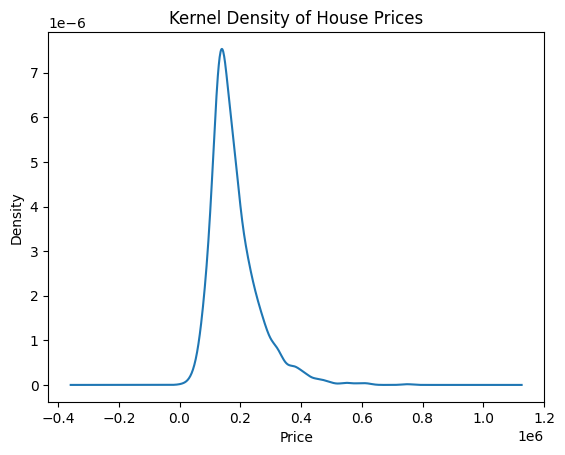

In [7]:
ames['price'].dropna().plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density of House Prices')
plt.show()

In [8]:
ames['price'].describe()

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


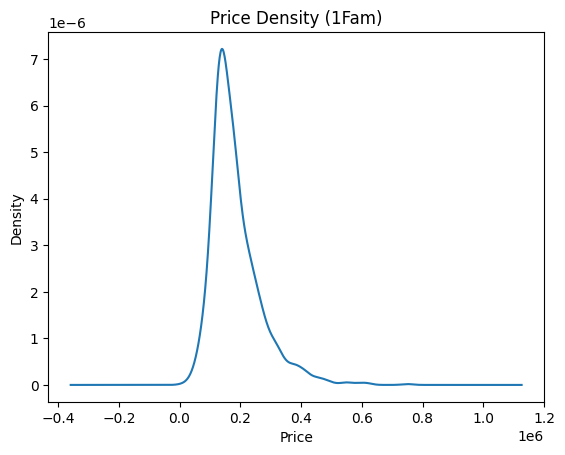

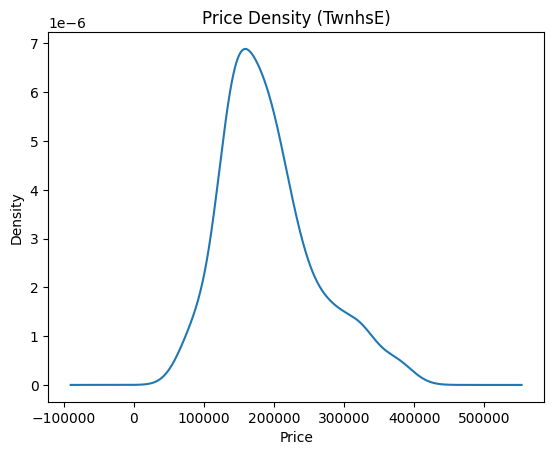

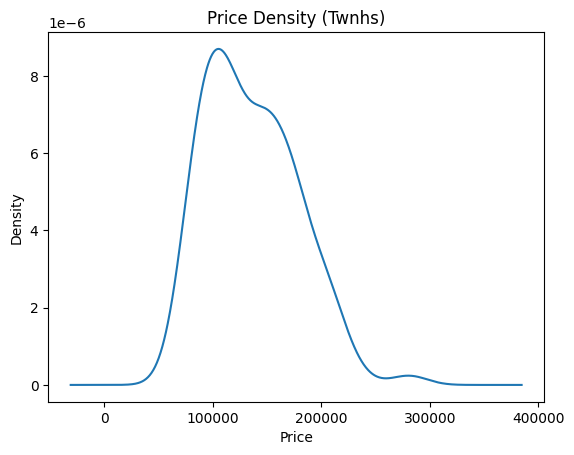

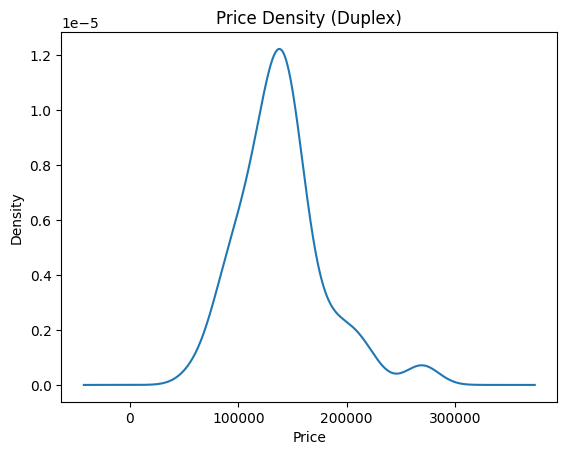

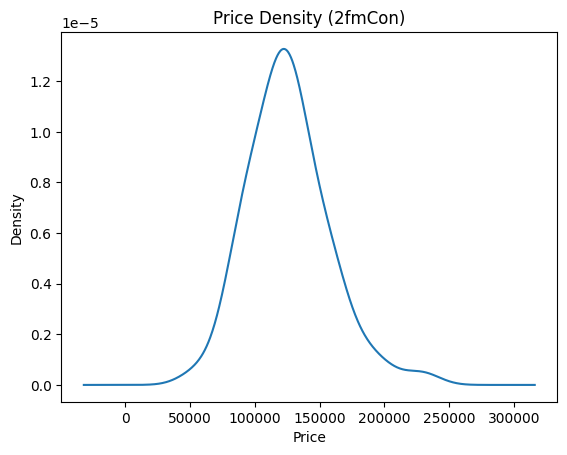

In [10]:
for b in ames['Bldg.Type'].dropna().unique():
    subset = ames[ames['Bldg.Type'] == b]['price'].dropna()
    plt.figure()
    subset.plot(kind='kde')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.title(f'Price Density ({b})')
    plt.show()

In [27]:
ames.groupby('Bldg.Type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Townhouses are the most expensive on average. 1 family houses have the highest variance in transaction prices.

3.

In [33]:
price_sorted = np.sort(ames['price'].dropna())
price_sorted

array([ 12789,  13100,  34900, ..., 625000, 745000, 755000])

In [34]:
ecdf = np.arange(1, len(price_sorted) + 1) / len(price_sorted)
ecdf

array([3.41296928e-04, 6.82593857e-04, 1.02389078e-03, ...,
       9.99317406e-01, 9.99658703e-01, 1.00000000e+00])

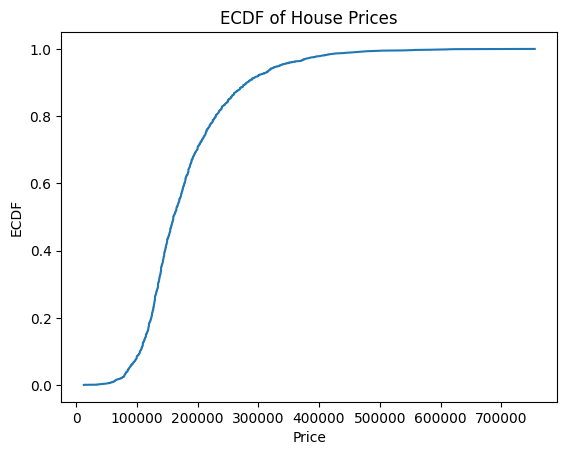

In [43]:
plt.plot(price_sorted, ecdf)
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('ECDF of House Prices')
plt.show()

In [42]:
ames['price'].quantile([0, 0.25, 0.5, 0.75, 1])

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


4.

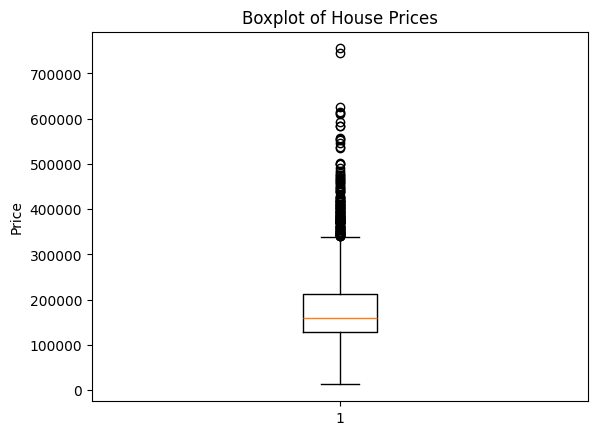

In [44]:
plt.boxplot(ames['price'].dropna())
plt.ylabel('Price')
plt.title('Boxplot of House Prices')
plt.show()

Yes, there are high price outliers.

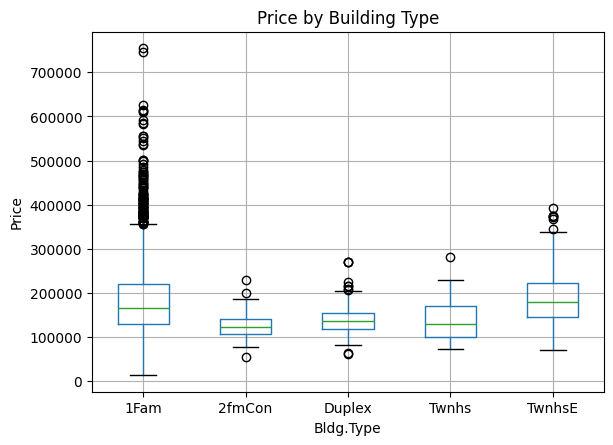

In [46]:
ames.boxplot(column='price', by='Bldg.Type')
plt.title('Price by Building Type')
plt.suptitle('')
plt.ylabel('Price')
plt.show()

1 family houses have a wider spread and the most amount of outliers. Additionally, 2 family condos and townhouses seem to have the lowest medians.

5.

In [55]:
Q1 = ames['price'].quantile(0.25)
Q3 = ames['price'].quantile(0.75)
Q1, Q3

(np.float64(129500.0), np.float64(213500.0))

In [56]:
IQR = Q3 - Q1
IQR

np.float64(84000.0)

In [57]:
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
upper, lower

(np.float64(339500.0), np.float64(3500.0))

In [58]:
ames['price_outlier'] = ((ames['price'] < lower) | (ames['price'] > upper)).astype(int)

6.

In [59]:
lower_w = ames['price'].quantile(0.05)
upper_w = ames['price'].quantile(0.95)
lower_w, upper_w

(np.float64(87500.0), np.float64(335000.0))

In [60]:
ames['price_winsor'] = ames['price'].clip(lower=lower_w, upper=upper_w)

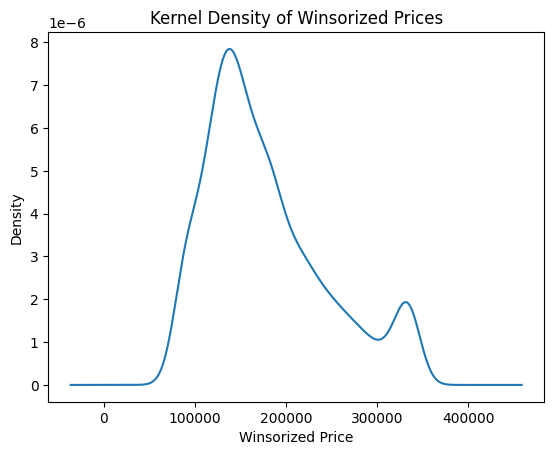

In [61]:
ames['price_winsor'].dropna().plot(kind='kde')
plt.xlabel('Winsorized Price')
plt.ylabel('Density')
plt.title('Kernel Density of Winsorized Prices')
plt.show()

In [62]:
ames['price_winsor'].describe()

,price_winsor
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


Winsorizing the price variable reduces the influence of extreme high priced houses, leading to lower variance. Additionally, the mean decreases.